In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from time import time
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [3]:
df_train2=pd.read_csv('/content/drive/MyDrive/Datasets/df_train2.csv',index_col='combined_date',parse_dates=True)
df_train2.head()

,time1,demand,demand_lag_1,demand_lag_2,demand_lag_3,demand_lag_4,demand_lag_5,demand_lag_6,demand_lag_7,demand_lag_8,...,demand_lag_21,demand_lag_22,demand_lag_23,demand_lag_24,demand_lag_25,demand_lag_26,demand_lag_27,demand_lag_28,demand_lag_29,demand_lag_30
combined_date,,,,,,,,,,,,,,,,,,,,,
2018-08-18 00:00:00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-08-18 01:00:00,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-08-18 02:00:00,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-08-18 03:00:00,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-08-18 04:00:00,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# create validation_set
X_val=df_train2.loc['2021-01-01':'2021-01-31'].drop('demand',axis=1)
y_val=df_train2.loc['2021-01-01':'2021-01-31','demand']

# Create training set
X_train=df_train2.loc[:'2020-12-31'].drop('demand',axis=1)
y_train=df_train2.loc[:'2020-12-31','demand']

In [ ]:
lr_model=LinearRegression()

lr_model.fit(X_train,y_train)
pred=pd.Series(lr_model.predict(X_val),index=y_val.index)
rmse=np.sqrt(mean_squared_error(y_val,pred))
print('val_RMSE: ',rmse)

val_RMSE:  35.847363169506735


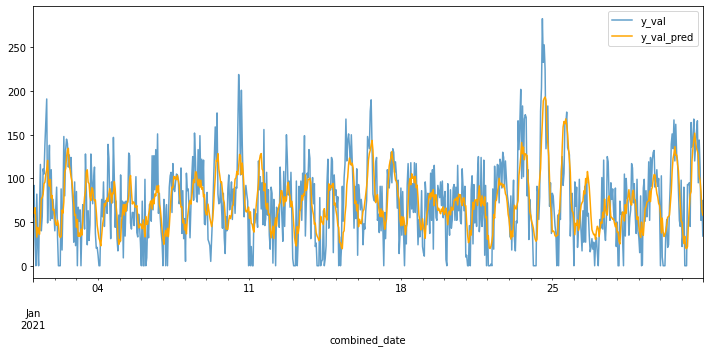

In [ ]:
y_val.plot(figsize=(12,5),alpha=0.7,label='y_val');
pred.plot(alpha=1,color='orange',label='y_val_pred')
plt.legend();

In [ ]:
start=time()
params = {
    "n_estimators":[100,300,500,1000],
     "learning_rate" : [0.05,0.10,0.15,0.20,0.25,0.30],
     "max_depth" : [ 3, 5, 8, 10, 12, 15,20],
     "min_child_weight" : [ 1, 3, 5, 7 ],
     "gamma": [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
     "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
        }


xgb_model = XGBRegressor()

# rs_model=BayesSearchCV(xgb_model,search_spaces=params,n_iter=50,
#                             scoring='neg_root_mean_squared_error',n_jobs=-1,cv=3,verbose=3)

rs_model=RandomizedSearchCV(xgb_model,param_distributions=params,n_iter=100,
                            scoring='neg_root_mean_squared_error',n_jobs=-1,cv=3,verbose=3)


rs_model.fit(X_train,y_train)
print(time()-start)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[18:39:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
4531.861988782883


In [ ]:
rs_model.best_params_

{'colsample_bytree': 0.4,
 'gamma': 0.2,
 'learning_rate': 0.05,
 'max_depth': 5,
 'min_child_weight': 1,
 'n_estimators': 100}

In [ ]:
pred=pd.Series(rs_model.predict(X_val),index=y_val.index)
rmse=np.sqrt(mean_squared_error(y_val,pred))
print(rmse)

35.39596815804868


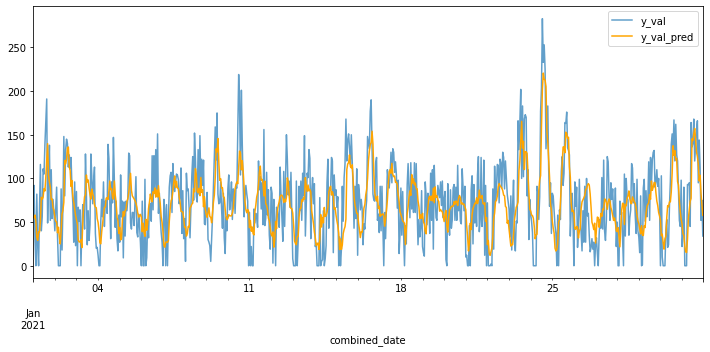

In [ ]:
y_val.plot(figsize=(12,5),alpha=0.7,label='y_val');
pred.plot(alpha=1,color='orange',label='y_val_pred')
plt.legend();

In [ ]:
# LightGBM Regressor optimization

In [10]:
start=time()
params = {
    "n_estimators":[1000],
     "learning_rate" : [0.01,0.1,0.3],
     "max_depth" : [ 3, 5, 8, 10, 12],
     "min_child_weight" : [ 0.001,0.1,1,10],
     "colsample_bytree" : [0.2,0.4,0.6],
     "num_leaves":np.arange(start=20,stop=3000,step=20),
     "min_child_samples":np.arange(start=20,stop=1000,step=100)

        }


lgb_model = LGBMRegressor()

# rs_model=BayesSearchCV(xgb_model,search_spaces=params,n_iter=50,
#                             scoring='neg_root_mean_squared_error',n_jobs=-1,cv=3,verbose=3)

rs_model=RandomizedSearchCV(lgb_model,param_distributions=params,n_iter=200,
                            scoring='neg_root_mean_squared_error',n_jobs=-1,cv=3,verbose=3)


rs_model.fit(X_train,y_train)
print(time()-start)

Fitting 3 folds for each of 200 candidates, totalling 600 fits


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


1762.8366346359253


In [11]:
rs_model.best_params_

{'colsample_bytree': 0.6,
 'learning_rate': 0.01,
 'max_depth': 8,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'n_estimators': 1000,
 'num_leaves': 2980}

In [12]:
rs_model.best_score_

-33.33294057314085